In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h5>Here we have taken 1 feature as x(x_train,x_test) and reshaped it into 2D array as fit need 2D</h5>

In [3]:
df = pd.read_csv('Housing.csv')


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [6]:
df.shape

(545, 13)

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

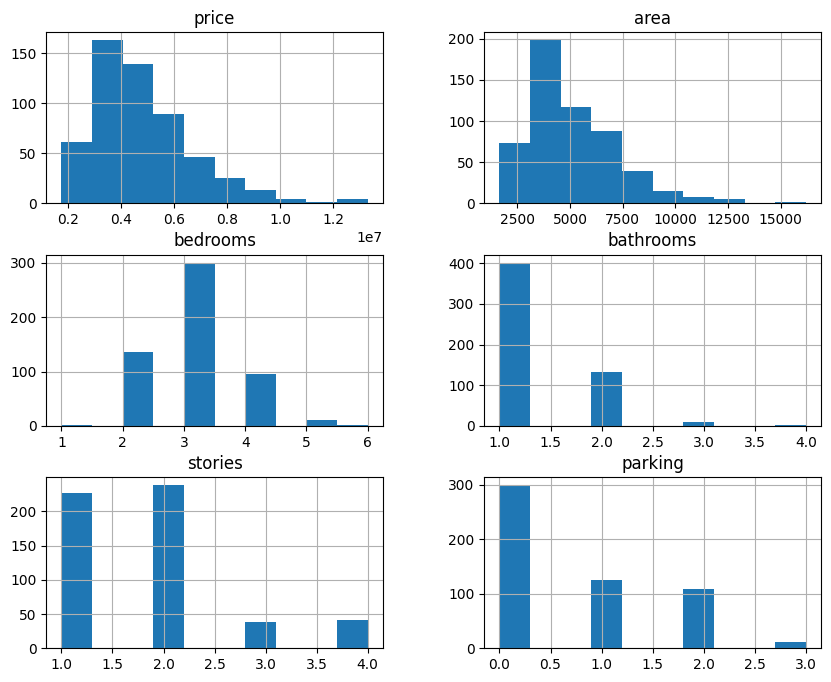

In [8]:
df.hist(figsize=(10,8))

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


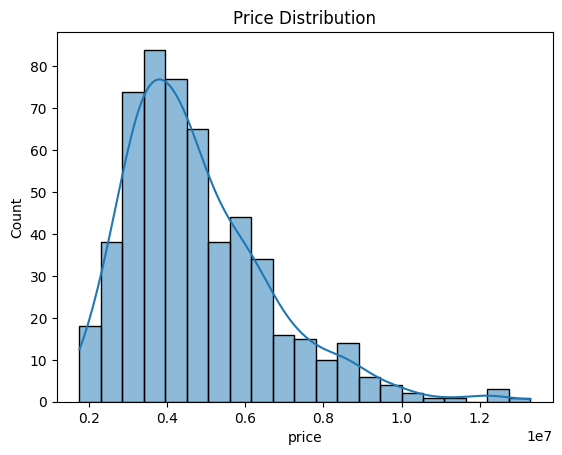

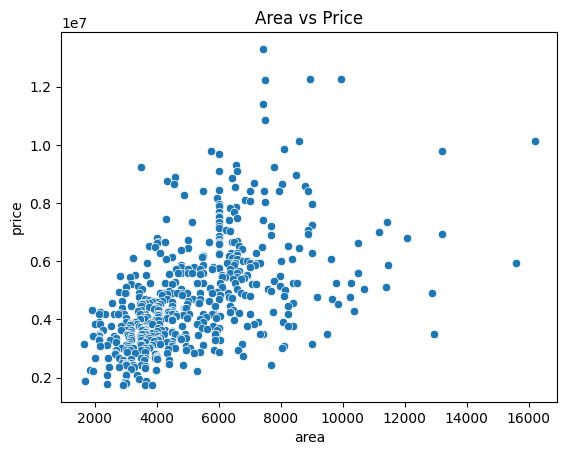

In [10]:
# Histogram of price (target)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Scatter plot for area vs price
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.show()



In [12]:
X = df[['area']].values
y = df['price'].values

# Normalize (important for gradient descent)
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [13]:
def plot_regression(X, y, theta, title):
    plt.scatter(X, y, label="Data", alpha=0.6)
    y_pred = theta[0] + theta[1] * X
    plt.plot(X, y_pred, color='red', label="Regression Line")
    plt.title(title)
    plt.xlabel("Normalized Area")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.show()

Epoch 0: MSE = 1.0000
Epoch 100: MSE = 0.7512
Epoch 200: MSE = 0.7179
Epoch 300: MSE = 0.7134
Epoch 400: MSE = 0.7128
Epoch 500: MSE = 0.7127
Epoch 600: MSE = 0.7127
Epoch 700: MSE = 0.7127
Epoch 800: MSE = 0.7127
Epoch 900: MSE = 0.7127


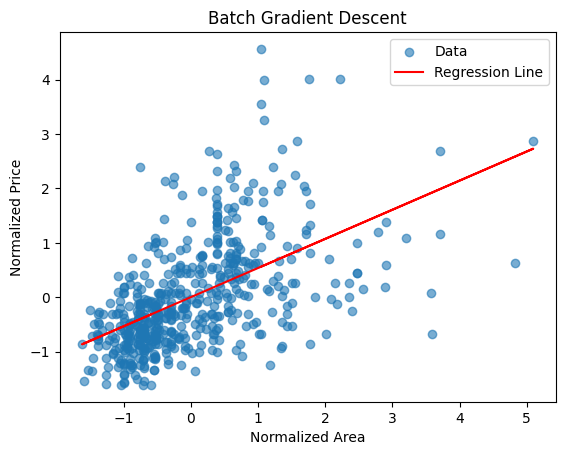

In [14]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(2)  # [bias, weight]

    for i in range(epochs):
        y_pred = theta[0] + theta[1] * X.flatten()
        error = y_pred - y
        theta[0] -= lr * error.mean()                  # update bias
        theta[1] -= lr * (error * X.flatten()).mean()  # update weight

        if i % 100 == 0:
            mse = (error ** 2).mean()
            print(f"Epoch {i}: MSE = {mse:.4f}")

    return theta

theta_batch = batch_gradient_descent(X, y)
plot_regression(X, y, theta_batch, "Batch Gradient Descent")


Epoch 1 complete  MSE = 0.3830417310430404
Epoch 2 complete  MSE = 0.37907989332911685
Epoch 3 complete  MSE = 0.37907123906630635
Epoch 4 complete  MSE = 0.37907123729015585
Epoch 5 complete  MSE = 0.37907123740141546
Epoch 6 complete  MSE = 0.37907123740218623
Epoch 7 complete  MSE = 0.37907123740218995
Epoch 8 complete  MSE = 0.37907123740218995
Epoch 9 complete  MSE = 0.37907123740218995
Epoch 10 complete  MSE = 0.37907123740218995


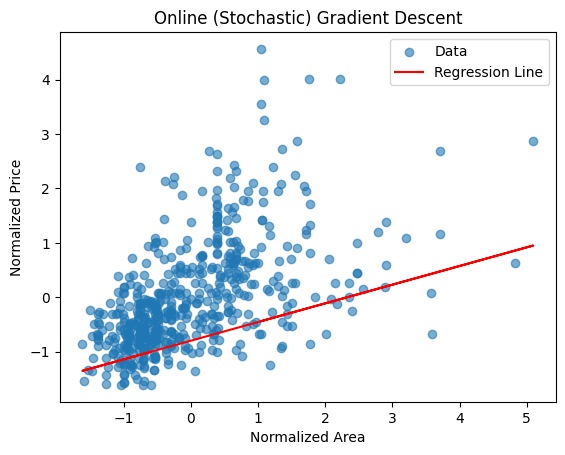

In [16]:
def online_gradient_descent(X, y, lr=0.01, epochs=10):
    m = len(y)
    theta = np.zeros(2)  # [bias, weight]

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i][0]
            yi = y[i]
            y_pred = theta[0] + theta[1] * xi
            error = y_pred - yi

            theta[0] -= lr * error         # update bias
            theta[1] -= lr * error * xi    # update weight

        mse = (error ** 2).mean()
        print(f"Epoch {epoch+1} complete  MSE =",mse)

    return theta

theta_online = online_gradient_descent(X, y)
plot_regression(X, y, theta_online, "Online (Stochastic) Gradient Descent")
